<a href="https://colab.research.google.com/github/jorgefpont/Coursera-ML-class/blob/master/ML_Ex2_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
# load data file from my github repo, ex2data1.txt
url = 'https://raw.githubusercontent.com/jorgefpont/Coursera-ML-class/master/machine-learning-ex2/ex2/ex2data2.txt'

# load file into pandas data frame
data = pd.read_csv(url, header = None)
data.columns = ["Test 1", "Test 2", "Pass"]
# separate X (features) and y ()
X = data.iloc[:,:-1] # read all columns except the last
y = data.iloc[:,-1] # read the last column
m = len(y) # number of training examples

# explore file
print("type data = ", type(data))
print("type X = ", type(X))
print("type y = ", type(y))
print()

print(data.head(),"\n")
print(data.info(),"\n")
print(data.describe())

type data =  <class 'pandas.core.frame.DataFrame'>
type X =  <class 'pandas.core.frame.DataFrame'>
type y =  <class 'pandas.core.series.Series'>

     Test 1   Test 2  Pass
0  0.051267  0.69956     1
1 -0.092742  0.68494     1
2 -0.213710  0.69225     1
3 -0.375000  0.50219     1
4 -0.513250  0.46564     1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
Test 1    118 non-null float64
Test 2    118 non-null float64
Pass      118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB
None 

           Test 1      Test 2        Pass
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646562    1.000000
max      1.070900    1.108900    1.000000


<function show at 0x7f5c66b05620>


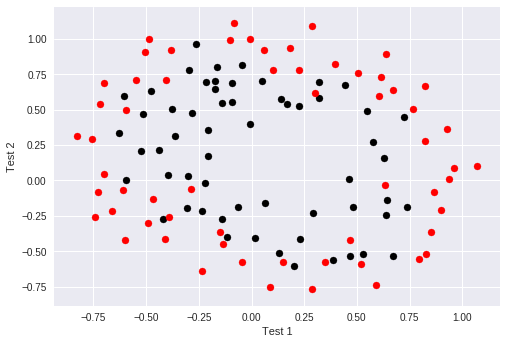

In [44]:
# plot the data
# using boolean indexing
# not sure why I have to convert to np arry before plotting
Pass = data[data['Pass'] == 1]
Pass = np.asarray(Pass)
notPass = data[data['Pass'] == 0]
notPass = np.asarray(notPass)
plt.scatter(Pass[:,0], Pass[:,1], color='black', label = 'Pass')
plt.scatter(notPass[:,0], notPass[:,1], color='red', label = 'Not Pass')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
print(plt.show)

In [45]:
# use scikit learn

m, n = X.shape

# add column of ones to X
#X = np.hstack((np.ones((m,1)), X))

# X without ones
# fit_intecept = True will add the ones
X = np.array(X)

# convert y into a proper np vector
y = y[:, np.newaxis]

clf = LogisticRegression(solver='lbfgs', fit_intercept=True)
clf.fit(X, y.flatten())
print(clf)
print("Coefficients = ", clf.coef_)  # get thethetas

tst = clf.predict(np.array([[-.50,-.50],[.5,.5],[.25,-.25]]))
print(tst)

#print(clf.score(X,y)) # accuracy
#as = accuracy_score(y,)

y_pred = clf.predict(X)

accuracy = accuracy_score(y.flatten(), y_pred)
print("Accuracy = ", accuracy)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Coefficients =  [[-0.26541433 -0.01162176]]
[1 0 0]
Accuracy =  0.5423728813559322
